In [2]:
from Bio import SeqIO, Entrez
import os
from urllib.error import HTTPError
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from itertools import permutations, product
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
import tqdm
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, cross_val_score

from numpy import mean
from numpy import std
import pickle
from os import path
from sklearn.model_selection import cross_val_score
from warnings import simplefilter
from collections import OrderedDict
from sklearn.metrics import accuracy_score, auc, confusion_matrix, balanced_accuracy_score, precision_recall_curve, auc, roc_curve, roc_auc_score

from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt


if (os.path.abspath('').split('/')[-1] == 'project'):
    %cd utils
elif (os.path.abspath('').split('/')[-1] == 'validate'):
    %cd ../utils

import query_utils
import model_utils
import validation_utils

print(os.path.abspath(''))

if (os.path.abspath('').split('/')[-1] == 'utils'):
    %cd ..


simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
simplefilter(action='ignore', category=FutureWarning)


/Users/benjaminli/Documents/coding/scires/project/utils
/Users/benjaminli/Documents/coding/scires/project


In [3]:
df = pd.read_csv('data/info.csv')
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'isZoonotic'], df['isZoonotic'], test_size=0.6, random_state=None)
# X_test = df.loc[:, df.columns != 'isZoonotic']
# y_test = df['isZoonotic']

In [4]:
# Models within "orig_models" folder have the highest training acc but not as great cross val

curr_dir = 'models/curr_models'
best_xgboost = pickle.load(open(f'{curr_dir}/xgBoost.pkl', 'rb'))
best_xgboost_params = pickle.load(open(f'{curr_dir}/xgBoost-params.pkl', 'rb'))

best_gradBoost = pickle.load(open(f'{curr_dir}/gradBoost.pkl', 'rb'))
best_gradBoost_params = pickle.load(open(f'{curr_dir}/gradBoost-params.pkl', 'rb'))

best_rF = pickle.load(open(f'{curr_dir}/randforest.pkl', 'rb'))
lrmodel = pickle.load(open(f'{curr_dir}/lrmodel.pkl', 'rb'))

nardus_gradBoost = pickle.load(open(f'models/nardus_gridsearch.pkl', 'rb'))

mlp = pickle.load(open(f'{curr_dir}/mlpClassifier.pkl', 'rb'))


validation_utils.cross_validate(nardus_gradBoost.best_estimator_, X_test, y_test)
# val_utils.cross_validate(mlp,X_test, y_test)

validation_utils.cross_validate(best_xgboost,X_test, y_test)
validation_utils.cross_validate(best_gradBoost,X_test, y_test)
validation_utils.cross_validate(best_rF,X_test, y_test)
validation_utils.cross_validate(lrmodel,X_test, y_test)

GradientBoostingClassifier
gradboost


KeyboardInterrupt: 

In [ ]:
# ALWAYS reset X columns to the right order

GradientBoostingClassifier
gradboost
precision recall: 0.9897630688304363
[0.00428132 0.00113316 0.0024633  ... 0.00256245 0.47434091 0.99292802]


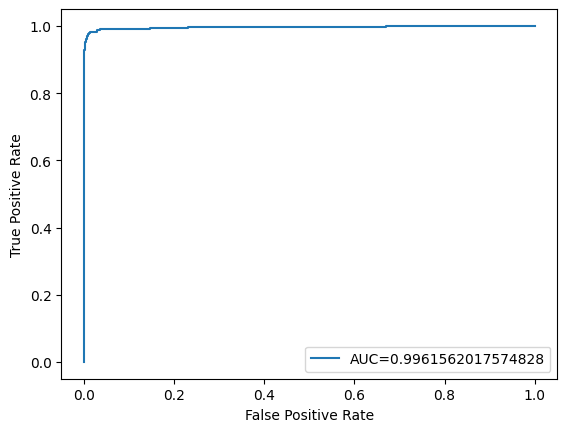

XGBClassifier
xgboost
precision recall: 0.9904508857677424
[4.0502381e-04 2.8329207e-06 7.6773147e-05 ... 9.8053017e-05 2.6711117e-02
 9.9983943e-01]


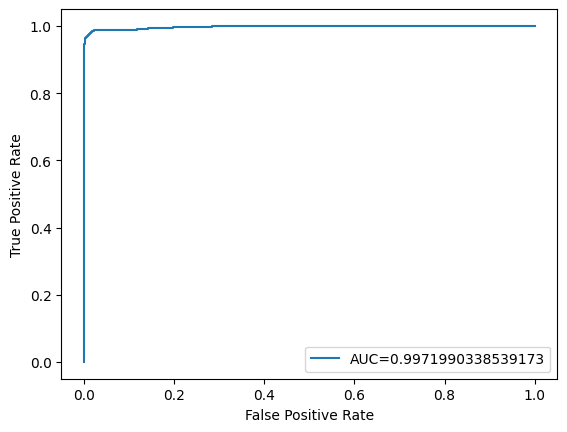

BalancedBaggingClassifier
precision recall: 0.9631178381950956
[0.1 0.  0.  ... 0.1 0.7 1. ]


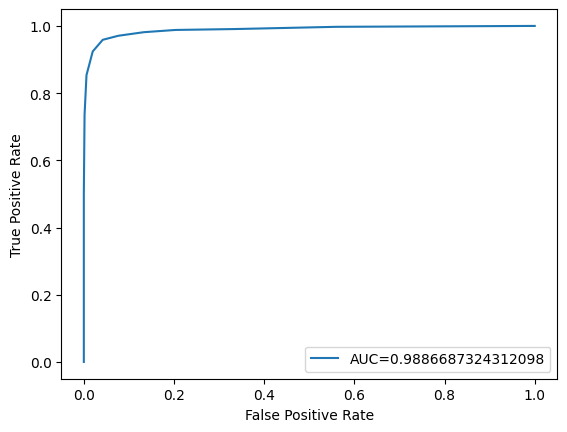

GradientBoostingClassifier
gradboost
precision recall: 0.9879229254445561
[0.00315288 0.00167544 0.00111399 ... 0.00323681 0.0591395  0.99025769]


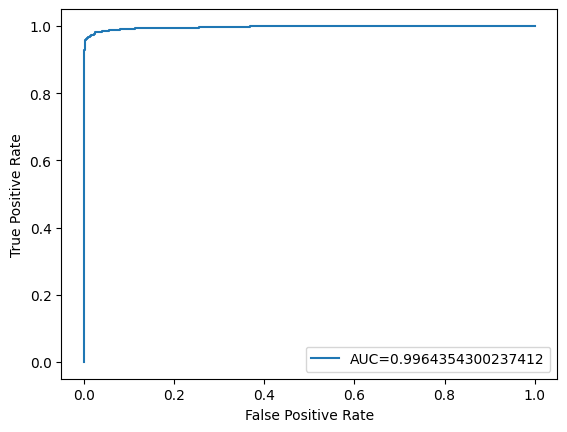

MLPClassifier
precision recall: 0.9786507370547296
[3.53679504e-08 1.50019940e-12 3.27536122e-05 ... 2.80427451e-08
 7.45000696e-03 9.99971606e-01]


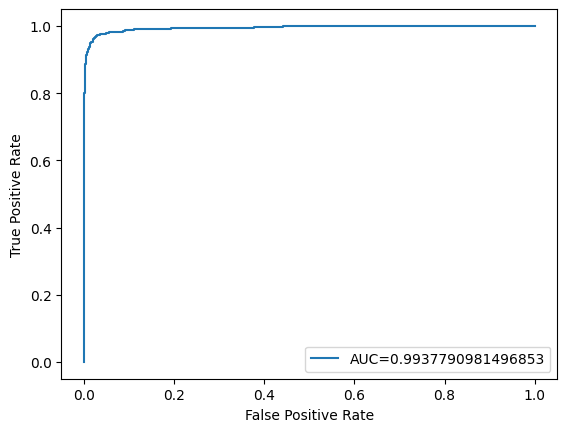

In [5]:
validation_utils.draw_roc_curve(nardus_gradBoost.best_estimator_, X_test, y_test)
validation_utils.draw_roc_curve(best_xgboost, X_test, y_test)
validation_utils.draw_roc_curve(best_rF, X_test, y_test)
validation_utils.draw_roc_curve(best_gradBoost, X_test, y_test)
validation_utils.draw_roc_curve(mlp, X_test, y_test)


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>


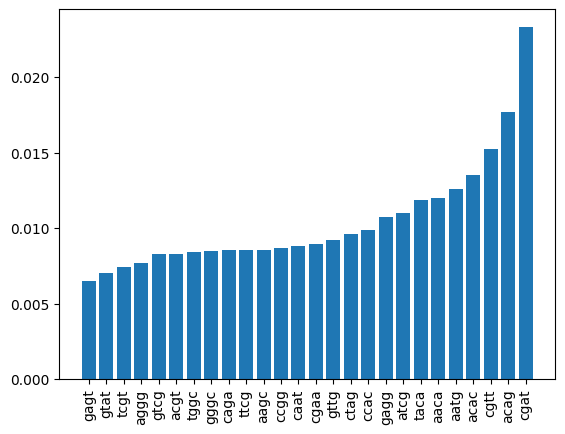

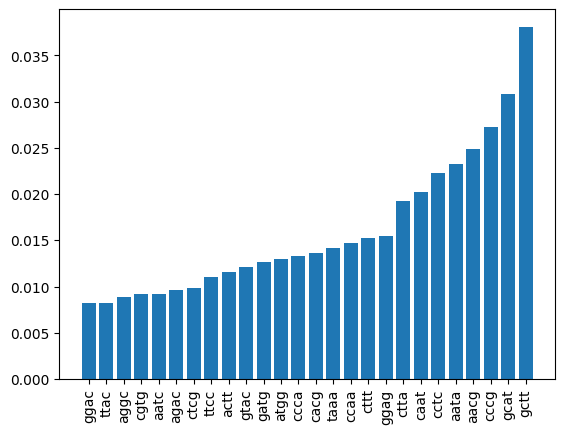

In [8]:
"""
validation_utils.draw_roc_curve(nardus_gradBoost.best_estimator_, X_test, y_test)
validation_utils.draw_roc_curve(best_xgboost, X_test, y_test)
validation_utils.draw_roc_curve(best_rF, X_test, y_test)
validation_utils.draw_roc_curve(best_gradBoost, X_test, y_test)
validation_utils.draw_roc_curve(mlp, X_test, y_test)

"""
print(type(nardus_gradBoost.best_estimator_))
validation_utils.draw_feature_importances(nardus_gradBoost.best_estimator_, X_test)
validation_utils.draw_feature_importances(best_gradBoost, X_test)


In [ ]:
# max_bound = 3
# for x in range(len(resrF)-max_bound+1):
#     for i in range(max_bound):
#         if resrF[x][0] == resgB[x+i][0]:  print("rF & gb bound", i, resrF[x], x)
#         if resrF[x][0] == resxG[x+i][0]:  print("rF & xg bound", i, resrF[x], x)
#         if resgB[x][0] == resxG[x+i][0]:  print("gb & xg bound", i, resgB[x], x)

rF & gb bound 1 ('cgcg', 0.0003015572826893574) 12
rF & xg bound 0 ('cgac', 0.0005925319998248206) 21
rF & gb bound 1 ('tatt', 0.0011150453509348468) 60
rF & gb bound 0 ('ctcg', 0.001601226302398424) 96
rF & xg bound 2 ('taac', 0.0016960808192351047) 105
rF & xg bound 1 ('caaa', 0.0018456698283735272) 115
gb & xg bound 1 ('agct', 0.002219047867503112) 122
rF & xg bound 1 ('ctca', 0.0020714853411268937) 132
rF & gb bound 2 ('gaac', 0.0025670387790062968) 151
gb & xg bound 0 ('taag', 0.014197001200931161) 244
